# AFL Stadium Analysis

In this document we are going to look at how matches of AFL compare from stadium to stadium. 

At first we will only be using data from the regular AFL season (including finals) but later we will expand the results out to other competitions of AFL

First let's set up the environment and do a quick overview of the data

In [1]:
import pandas as pd
import sqlite3

sqliteConnection = sqlite3.connect('SQLite_Python.db')
df = pd.read_sql_query("SELECT * FROM matches WHERE competition = 'Toyota AFL Premiership'", sqliteConnection)

df.head()

,id,competition,season,round,date,kick_off,stadium,winner,home_team,home_score,home_goals,home_points,away_team,away_score,away_goals,away_points
0,1,Toyota AFL Premiership,2012,1,2012-03-31,02:45,MCG,Brisbane Lions,Melbourne,78,11,12,Brisbane Lions,119,17,17
1,72,Toyota AFL Premiership,2012,5,2012-04-28,09:45,Gabba,Geelong Cats,Brisbane Lions,41,4,17,Geelong Cats,79,12,7
2,143,Toyota AFL Premiership,2012,15,2012-07-06,09:50,MCG,Carlton,Collingwood,62,8,14,Carlton,85,12,13
3,214,Toyota AFL Premiership,2012,22,2012-08-26,03:10,GMHBA Stadium,Geelong Cats,Geelong Cats,107,16,11,Western Bulldogs,73,11,7
4,285,Toyota AFL Premiership,2013,3,2013-04-13,04:10,MCG,West Coast Eagles,Melbourne,83,13,5,West Coast Eagles,177,27,15


As you can see we've got pretty basic stats about the scores of the matches and who won. 

Let's have a look at all the different ground the AFL has played at since 2012

In [2]:
df.groupby('stadium')['id'].count().sort_values(ascending=False)

stadium
MCG                                   414
Marvel Stadium                        380
Domain Stadium                        140
Adelaide Oval                         138
Gabba                                  98
Metricon Stadium                       96
SCG                                    85
GIANTS Stadium                         72
GMHBA Stadium                          66
Optus Stadium                          51
AAMI Stadium                           46
University of Tasmania Stadium         32
UNSW Canberra Oval                     24
Blundstone Arena                       22
ANZ Stadium                            18
TIO Stadium                            10
Cazaly's Stadium                        7
TIO Traeger Park                        6
Mars Stadium                            5
Adelaide Arena at Jiangwan Stadium      3
Westpac Stadium                         3
Riverway Stadium                        1
Blacktown International Sportspark      1
Name: id, dtype: int64

We want to find out which stadium regularly produces exiting games. One way to look at this is to see which stadium has close games on average

In [3]:
df['difference'] = abs(df['home_score'] - df['away_score'])
df.groupby('stadium')['difference'].mean().sort_values(ascending=True)

stadium
Riverway Stadium                       4.000000
Westpac Stadium                       19.666667
Mars Stadium                          24.000000
Cazaly's Stadium                      25.571429
AAMI Stadium                          29.282609
MCG                                   30.794686
Optus Stadium                         31.235294
Marvel Stadium                        34.039474
Blundstone Arena                      34.454545
TIO Stadium                           34.500000
ANZ Stadium                           34.944444
Metricon Stadium                      35.489583
SCG                                   36.305882
Adelaide Oval                         37.333333
Gabba                                 37.387755
Domain Stadium                        40.200000
GMHBA Stadium                         40.696970
UNSW Canberra Oval                    41.458333
University of Tasmania Stadium        43.843750
TIO Traeger Park                      44.166667
GIANTS Stadium                  

Looking at this list it shows that on average most games result in a margin around 32 points. Which, isn't the most exciting margin. Maybe we need to look at how many matches resulted in less than a 10 point margin.

In [4]:
df['difference'] = abs(df['home_score'] - df['away_score'])
df.where(df['difference'] < 10).dropna().groupby('stadium').difference.count().sort_values(ascending=False)

stadium
MCG                               82
Marvel Stadium                    76
Domain Stadium                    22
Adelaide Oval                     19
SCG                               19
Metricon Stadium                  18
Gabba                             18
AAMI Stadium                      13
GIANTS Stadium                    11
Optus Stadium                      9
GMHBA Stadium                      9
Blundstone Arena                   7
University of Tasmania Stadium     4
TIO Stadium                        2
Cazaly's Stadium                   2
UNSW Canberra Oval                 2
ANZ Stadium                        2
Mars Stadium                       1
Riverway Stadium                   1
Westpac Stadium                    1
Name: difference, dtype: int64

As most matches are played at the MCG or Marvel lets look at the percentages of games that are close.

In [5]:
round((df.where(df['difference'] < 30).dropna().groupby('stadium').difference.count() / df.groupby('stadium')['id'].count()) * 100, 2).sort_values(ascending=False)

stadium
Riverway Stadium                      100.00
Cazaly's Stadium                       71.43
Westpac Stadium                        66.67
ANZ Stadium                            61.11
Mars Stadium                           60.00
MCG                                    57.97
Optus Stadium                          56.86
AAMI Stadium                           56.52
SCG                                    51.76
Marvel Stadium                         51.05
Adelaide Oval                          47.83
Domain Stadium                         47.14
Gabba                                  46.94
Metricon Stadium                       45.83
Blundstone Arena                       45.45
GMHBA Stadium                          40.91
GIANTS Stadium                         40.28
TIO Stadium                            40.00
UNSW Canberra Oval                     37.50
TIO Traeger Park                       33.33
University of Tasmania Stadium         28.12
Adelaide Arena at Jiangwan Stadium       NaN
Bl

Wow well all I can say is in the name of neutral watch South Australia should have never got rid of AAMI stadium but intersting to see that the skinny SCG produces the most close games out of the Major stadiums.

So can we just say that Riverway is the most exciting stadium or the SCG is the most exciting 'major' stadium? Maybe, but it's quite disappointing to see that on average only 1 in 5 games are 'exciting'. Here's a quick breakdown on different break points of margins

In [6]:
test = round((df.where(df['difference'] < 5).dropna().groupby('stadium').difference.count() / df.groupby('stadium')['id'].count()) * 100, 2).sort_values(ascending=False)
test2 = round((df.where(df['difference'] < 10).dropna().groupby('stadium').difference.count() / df.groupby('stadium')['id'].count()) * 100, 2).sort_values(ascending=False)
differenceDist = pd.concat([round((df.where((df['difference'] < x) & (df['difference'] > x - 5)).dropna().groupby('stadium').difference.count() / df.groupby('stadium')['id'].count()) * 100, 2) for x in range(5, 101, 5)], axis=1)
differenceDist.columns = range(5, 101, 5)
differenceDist


,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
stadium,,,,,,,,,,,,,,,,,,,,
AAMI Stadium,15.22,10.87,4.35,10.87,2.17,8.70,NaN,2.17,2.17,10.87,4.35,4.35,NaN,2.17,NaN,2.17,NaN,NaN,2.17,NaN
ANZ Stadium,5.56,5.56,11.11,5.56,11.11,16.67,NaN,5.56,5.56,NaN,NaN,NaN,5.56,NaN,5.56,NaN,NaN,5.56,5.56,NaN
Adelaide Arena at Jiangwan Stadium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,NaN,NaN,NaN,NaN,NaN
Adelaide Oval,9.42,2.90,6.52,5.07,10.14,4.35,6.52,6.52,1.45,5.07,1.45,5.80,3.62,1.45,1.45,2.90,1.45,2.17,NaN,NaN
Blacktown International Sportspark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NaN,NaN,NaN
Blundstone Arena,9.09,9.09,NaN,NaN,4.55,NaN,NaN,13.64,9.09,NaN,NaN,9.09,NaN,NaN,NaN,NaN,NaN,4.55,NaN,NaN
Cazaly's Stadium,14.29,14.29,NaN,14.29,14.29,14.29,NaN,NaN,NaN,14.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Domain Stadium,5.00,7.86,3.57,7.14,5.71,9.29,4.29,4.29,2.86,3.57,3.57,1.43,2.14,3.57,2.14,3.57,0.71,1.43,0.71,1.43
GIANTS Stadium,8.33,5.56,5.56,2.78,2.78,1.39,12.50,2.78,2.78,2.78,NaN,4.17,2.78,4.17,1.39,NaN,2.78,1.39,4.17,NaN


<AxesSubplot:>

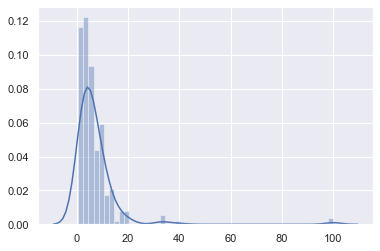

In [15]:
import seaborn as sns
sns.distplot(differenceDist)

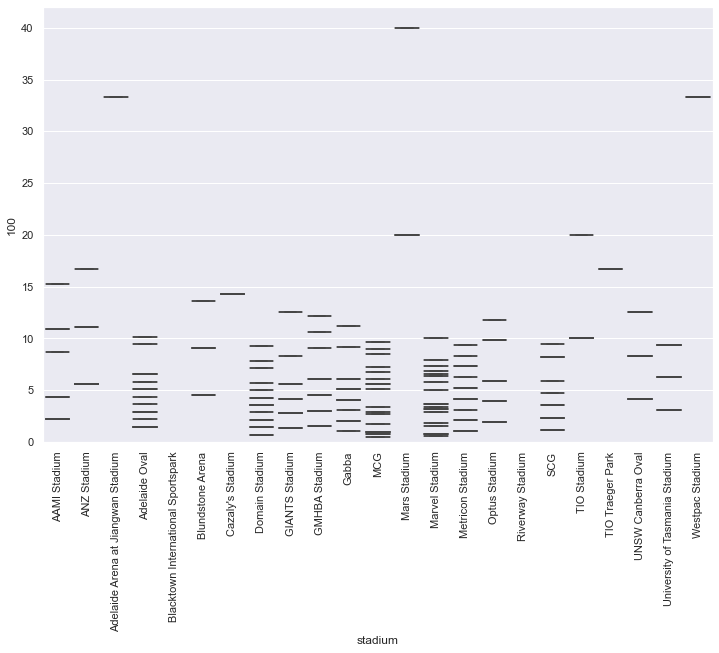

In [58]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(12, 8)

for y in range(5,101,5):
    xy = sns.boxplot(x=differenceDist.index, y=y, data=differenceDist)
    xy.set_xticklabels(labels=differenceDist.index, rotation=90)
    xy.set_ylim(0,42)
